<h1>Deep learning project 8DM20 CSMIA</h1>

<h4>Group members:</h4>
Attee <br>
Jolien <br>
Lieke <br>
Osman <br>
Tim Beishuizen - 0791613

In [58]:
# Import all used packages (unused packages are commented out so far)
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.feature_extraction import image as sklearn_image
#matplotlib inline
#import theano
#import lasagne
#import time
#import random
#random.seed(0)

Before every thing can be done, at first the data images have to be read and be made in useable data types.

In [28]:
# The function that loads the data
def loadData(data_set = 'test', image = '1st_manual'):
    
    # Check for the correct input
    if data_set != 'test' and data_set != 'training':
        raise Exception('Not the right data_set file')
    if image != '1st_manual' and image != '2nd_manual' and image != 'images' and image != 'mask':
        raise Exception('Not the right image file')
    if data_set == 'training' and image == '2nd_manual':
        raise Exception('File not available')
    
    # Project and image path
    project_path = os.getcwd()
    images_path = project_path +  '/8DM20_image_dataset/' + data_set + '/' + image + '/'
    
    images = []
    
    #Open image for image (20 in total for each of them)
    for i in range(1, 21):
        
        # Find correct image number
        image_nr = str(i)
        if data_set == 'training':
            image_nr = str(20 + i)
        elif len(image_nr) == 1:
            image_nr = '0' + image_nr
            
        # Specify path for this image
        if image == '1st_manual':
            image_path = images_path + image_nr + '_manual1.gif'
        elif image == '2nd_manual':
            image_path = images_path + image_nr + '_manual2.gif'
        elif image == 'images':
            image_path = images_path + image_nr + '_' + data_set + '.tif'
        elif image == 'mask':
            image_path = images_path + image_nr + '_' + data_set + '_mask.gif'
        
        # Open and append the image to the image list
        images.append(Image.open(image_path))
    
    return images

#The function that makes matrices from the images
def imageToMatrix(images):
    
    image_matrices = []
    
    for image in images:
        image_matrix = np.asarray(image.convert('L'))
        image_matrices.append(image_matrix)
        
    return image_matrices

In [30]:
# All test image lists
test_manual1_images = loadData('test', '1st_manual')
test_manual2_images = loadData('test', '2nd_manual')
test_raw_images = loadData('test', 'images')
test_mask_images = loadData('test', 'mask')

# Making matrices of the test images to work with
test_manual1_matrices = imageToMatrix(test_manual1_images)
test_manual2_matrices = imageToMatrix(test_manual2_images)
test_raw_matrices = imageToMatrix(test_raw_images)
test_mask_matrices = imageToMatrix(test_mask_images)

# All training image lists
training_manual1_images = loadData('training', '1st_manual')
training_raw_images = loadData('training', 'images')
training_mask_images = loadData('training', 'mask')

# Making matrices of the training images to work with
training_manual1_matrices = imageToMatrix(training_manual1_images)
training_raw_matrices = imageToMatrix(training_raw_images)
training_mask_matrices = imageToMatrix(training_mask_images)


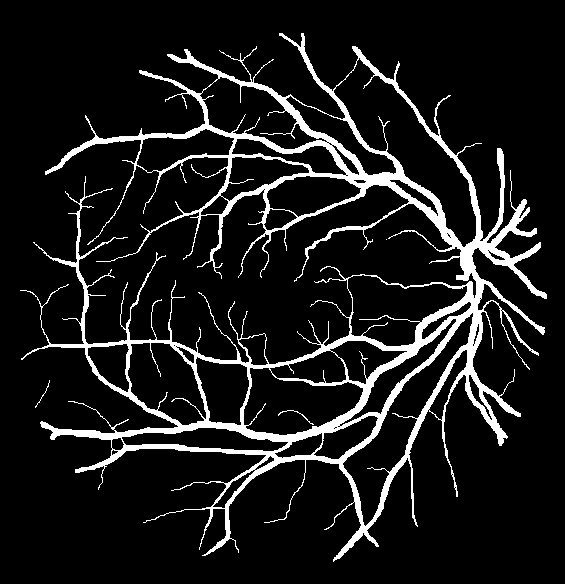

In [36]:
# If needed, this is the way to show everything graphically
plt.imshow(test_raw_matrices[1]) #For matrices (lower image)
test_manual1_images[1] #For images (upper image)


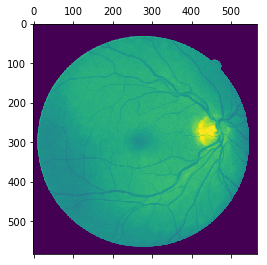

In [51]:
raw_matrix= test_raw_matrices[1]
mask_matrix = test_mask_matrices[1]

raw_matrix.setflags(write=1)

for i in range(raw_matrix.shape[0]):
    for j in range(raw_matrix.shape[1]):
                   if mask_matrix[i,j] == 0:
                       raw_matrix[i,j] = 0;

plt.matshow(raw_matrix)
plt.show()


In [78]:
raw_matrix= test_manual1_matrices[1]
mask_matrix = test_mask_matrices[1]

raw_matrix.setflags(write=1)

for i in range(raw_matrix.shape[0]):
    for j in range(raw_matrix.shape[1]):
                   if mask_matrix[i,j] == 0:
                       raw_matrix[i,j] = float("NaN")

plt.matshow(raw_matrix)
plt.show()

ValueError: cannot convert float NaN to integer

In [95]:
image_patches = sklearn_image.extract_patches_2d(test_raw_matrices[1],(25,25))
vessel_patches = sklearn_image.extract_patches_2d(test_manual1_matrices[1],(25,25))
mask_patches = sklearn_image.extract_patches_2d(test_mask_matrices[1],(25,25))

vessel_results = []
mask_results = []

for i in range(vessel_patches.shape[0]):
    vessel_results.append(vessel_patches[i, 13, 13])
    mask_results.append(mask_patches[i, 13, 13])

right_image_patches = []
right_vessel_results = []
right_mask_results = []
    
    
for i in range(len(mask_results)):
    if mask_results[i] == 255:
        right_image_patches.append(image_patches[i,:,:])
        right_vessel_results.append(vessel_results[i])
    
print(np.asarray(right_image_patches).shape)
print(np.asarray(right_vessel_results).shape)

plt.matshow(right_image_patches[1])

(224977L, 25L, 25L)
(224977L,)


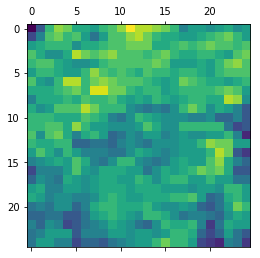

In [91]:
plt.matshow(right_image_patches[104976])
plt.show()